In [1]:
%reload_ext autoreload
%autoreload 2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# Import necessary functions for command line execution
import argparse
import os
from time import strftime
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from al_utils import *

# Import relevant functions from MLDE
from Support.RunMlde.RunFuncs import run_mlde_cl, process_args, main_loop

Using TensorFlow backend.


In [2]:
training_data_file = "./Validation/BasicTestData/InputValidationData.csv"
encoding_data_file = "./georgiev_enc/Encodings/example_protein_georgiev_Normalized.npy"
combo_to_ind_dict_file = "./georgiev_enc/Encodings/example_protein_georgiev_ComboToIndex.pkl"
# model_params_file = "./Validation/BasicTestData/TestMldeParams.csv"
all_fitness_file = "./Validation/BasicTestData/Fitness.npy"


INIT_TYPE = "random"
NUM_SELECT = 96
NUM_LOOPS = 4
NUM_TRIALS = 20
AL_STRATEGIES = ["ucb", "ucb", "ucb", "ucb"]

EXP_FOLDER_NAME = "{}_{}_{}_{}_{}".format(INIT_TYPE, NUM_SELECT, NUM_LOOPS, NUM_TRIALS, "ucb_expectation")
EXP_FOLDER_NAME = os.path.join("al_results", EXP_FOLDER_NAME)

if not os.path.isdir(EXP_FOLDER_NAME):
    os.mkdir(EXP_FOLDER_NAME)

exp_params = {"INIT_TYPE":INIT_TYPE, "NUM_SELECT":NUM_SELECT, "NUM_LOOPS":NUM_LOOPS, "NUM_TRIALS":NUM_TRIALS, "AL_STRATEGIES":AL_STRATEGIES}

pickle.dump(exp_params, open( os.path.join(EXP_FOLDER_NAME, "exp_params.pkl"), "wb" ))

actual_fitness = pickle.load(open("all_fitness.pkl", "rb"))
all_combos = list(actual_fitness.keys())

In [3]:
training_data, normalized_design_space, combo_to_ind = process_args(training_data_file, encoding_data_file, combo_to_ind_dict_file)

In [4]:
assert len(AL_STRATEGIES) == NUM_LOOPS
all_metrics = []
all_train_pools = []

for i in range(NUM_TRIALS):
    if INIT_TYPE == "random":  
        init_pool = list(np.random.choice(all_combos, NUM_SELECT))
    elif INIT_TYPE == "384":
        init_pool = list(np.random.choice(pd.read_csv(training_data_file).AACombo, NUM_SELECT))
    elif INIT_TYPE == "ddG":
        pass
    metrics, train_pools = main_loop(normalized_design_space, combo_to_ind,
                                     num_loops = NUM_LOOPS,al_strategy = AL_STRATEGIES,
                                     train_pool = init_pool, num_select = NUM_SELECT, hyperopt = False)
    all_metrics.append(metrics)
    all_train_pools.append(train_pools)
    
all_metrics = np.array(all_metrics)
all_train_pools = np.array(all_train_pools)
np.save(os.path.join(EXP_FOLDER_NAME, "metrics.npy"), all_metrics)
np.save(os.path.join(EXP_FOLDER_NAME, "train_pools.npy"), all_train_pools)

Default Training:   0%|          | 0/22 [00:00<?, ?it/s]

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 96


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 192


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 288


Default Training:   0%|          | 0/22 [00:00<?, ?it/s]         

Train Pool Size: 384


<ErrorbarContainer object of 3 artists>

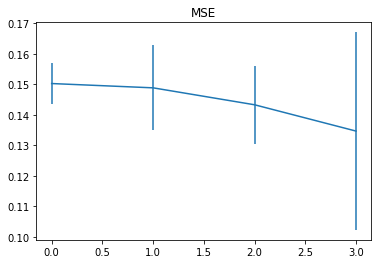

In [15]:
plt.title("MSE")
plt.errorbar(range(NUM_LOOPS), [m[0] for m in all_metrics.mean(axis = 0)], [m[0] for m in all_metrics.std(axis = 0)])

<ErrorbarContainer object of 3 artists>

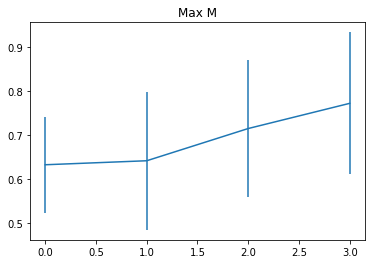

In [16]:
plt.title("Max M")
plt.errorbar(range(NUM_LOOPS), [m[1] for m in all_metrics.mean(axis = 0)], [m[1] for m in all_metrics.std(axis = 0)])

<ErrorbarContainer object of 3 artists>

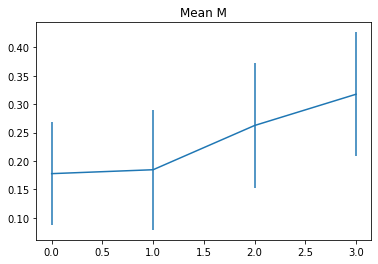

In [17]:
plt.title("Mean M")
plt.errorbar(range(NUM_LOOPS), [m[2] for m in all_metrics.mean(axis = 0)], [m[2] for m in all_metrics.std(axis = 0)])

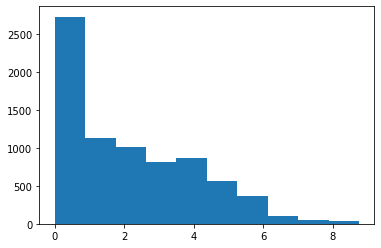

In [8]:
plt.hist(fitness_train_pool(all_train_pools[:,-1]))
plt.show()